# 2. Supervised Learning

### 2.3.7 커널 서포트 백터 머신
- 커널 서포트 백터 머시 (SVM)
    - 분류용 선형 모델을 보다 더 복잡한 모델 용으로 확장

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split

### 선형 모델과 비선형 특성
- 선형적으로 구분되지 않는 클래스를 가진 이진 분류 데이터셋

Text(0,0.5,'Feature 1')

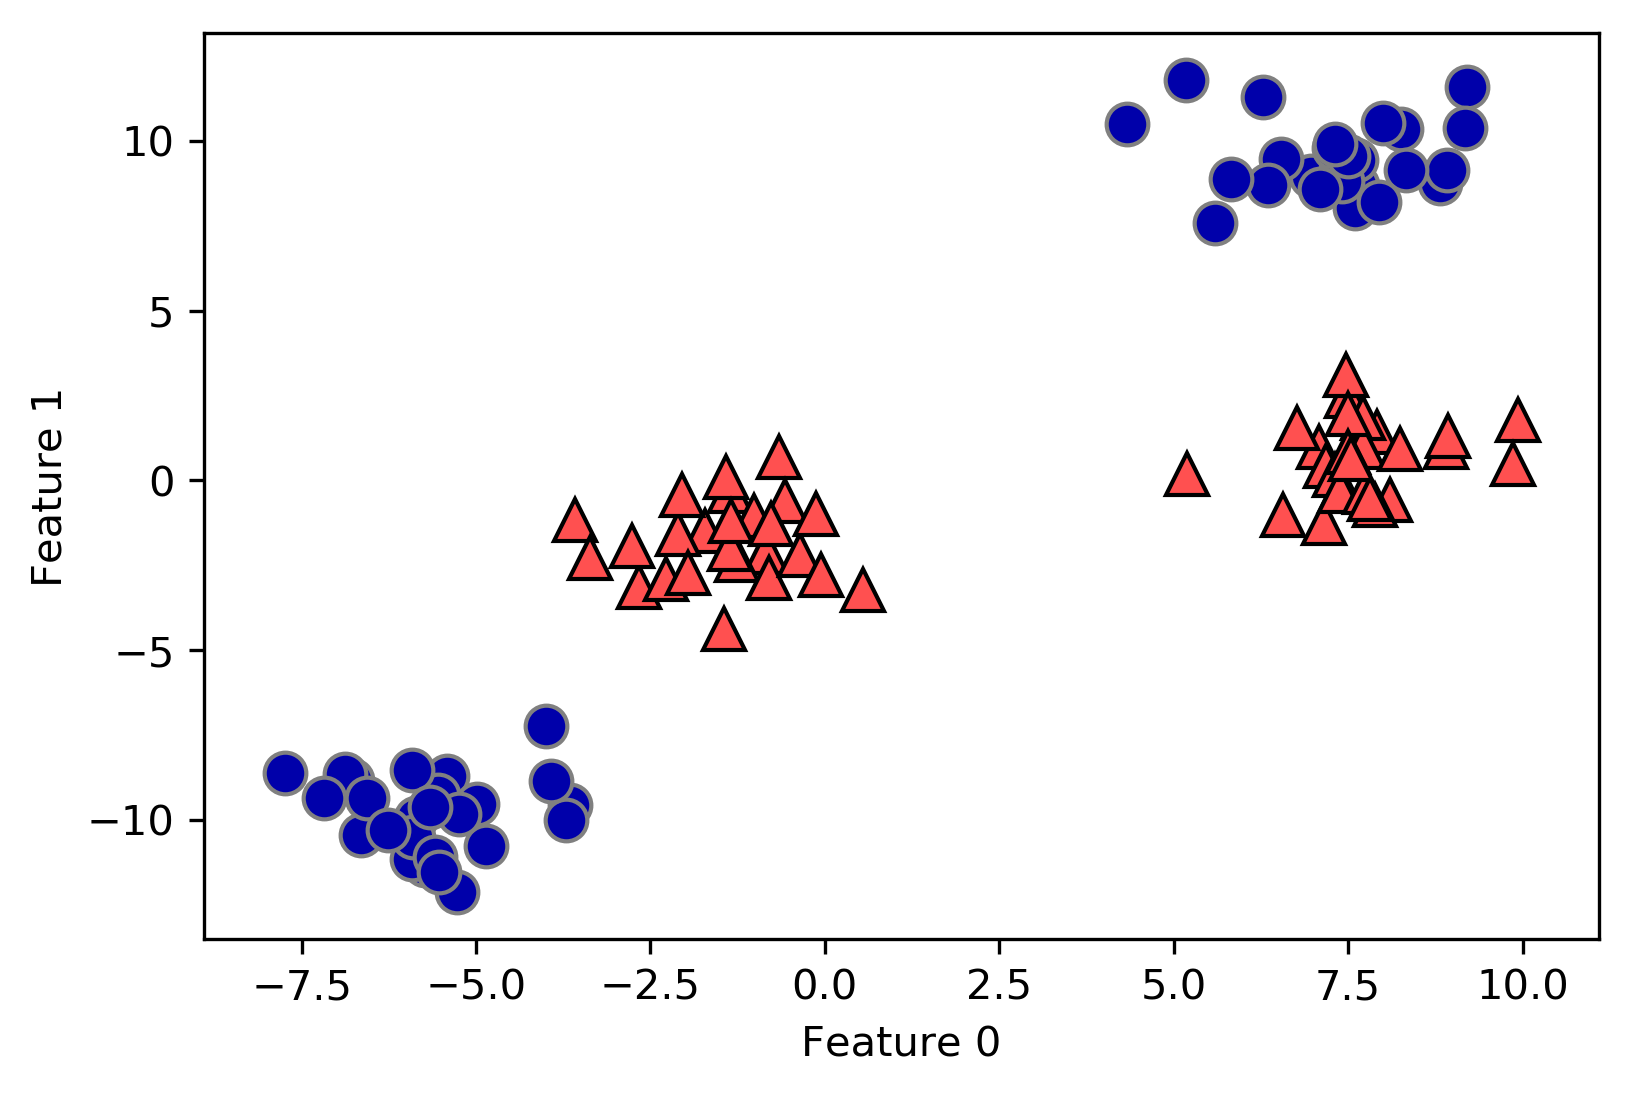

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

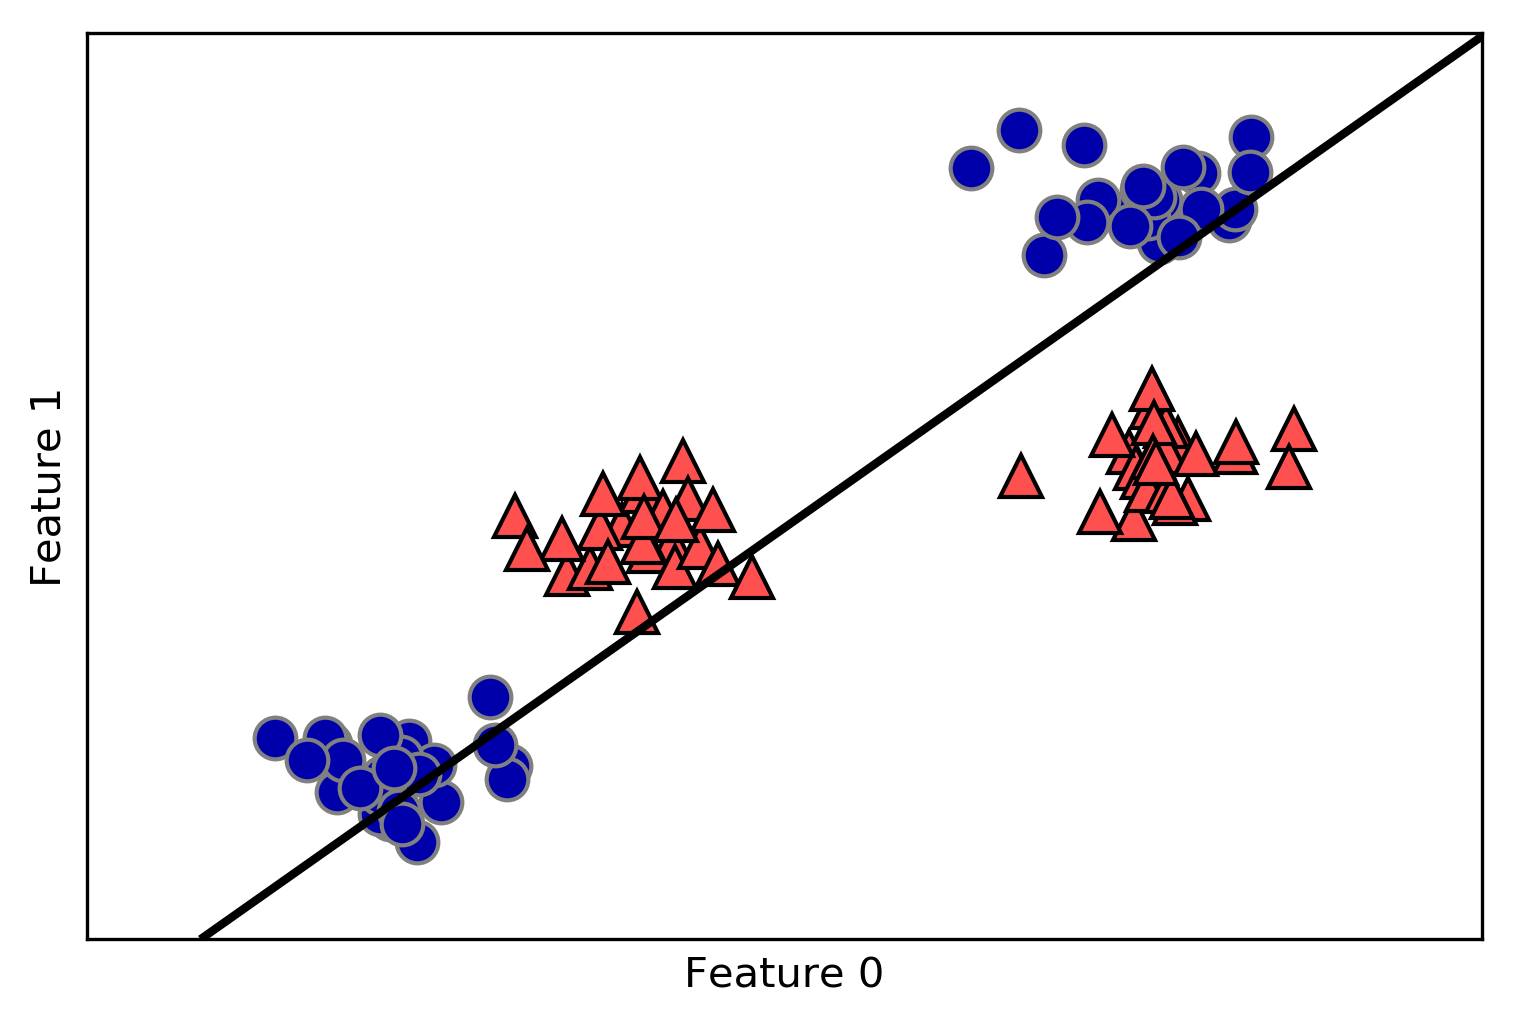

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

(100, 2)
(100, 3)


Text(0.5,0,'feature1 ** 2')

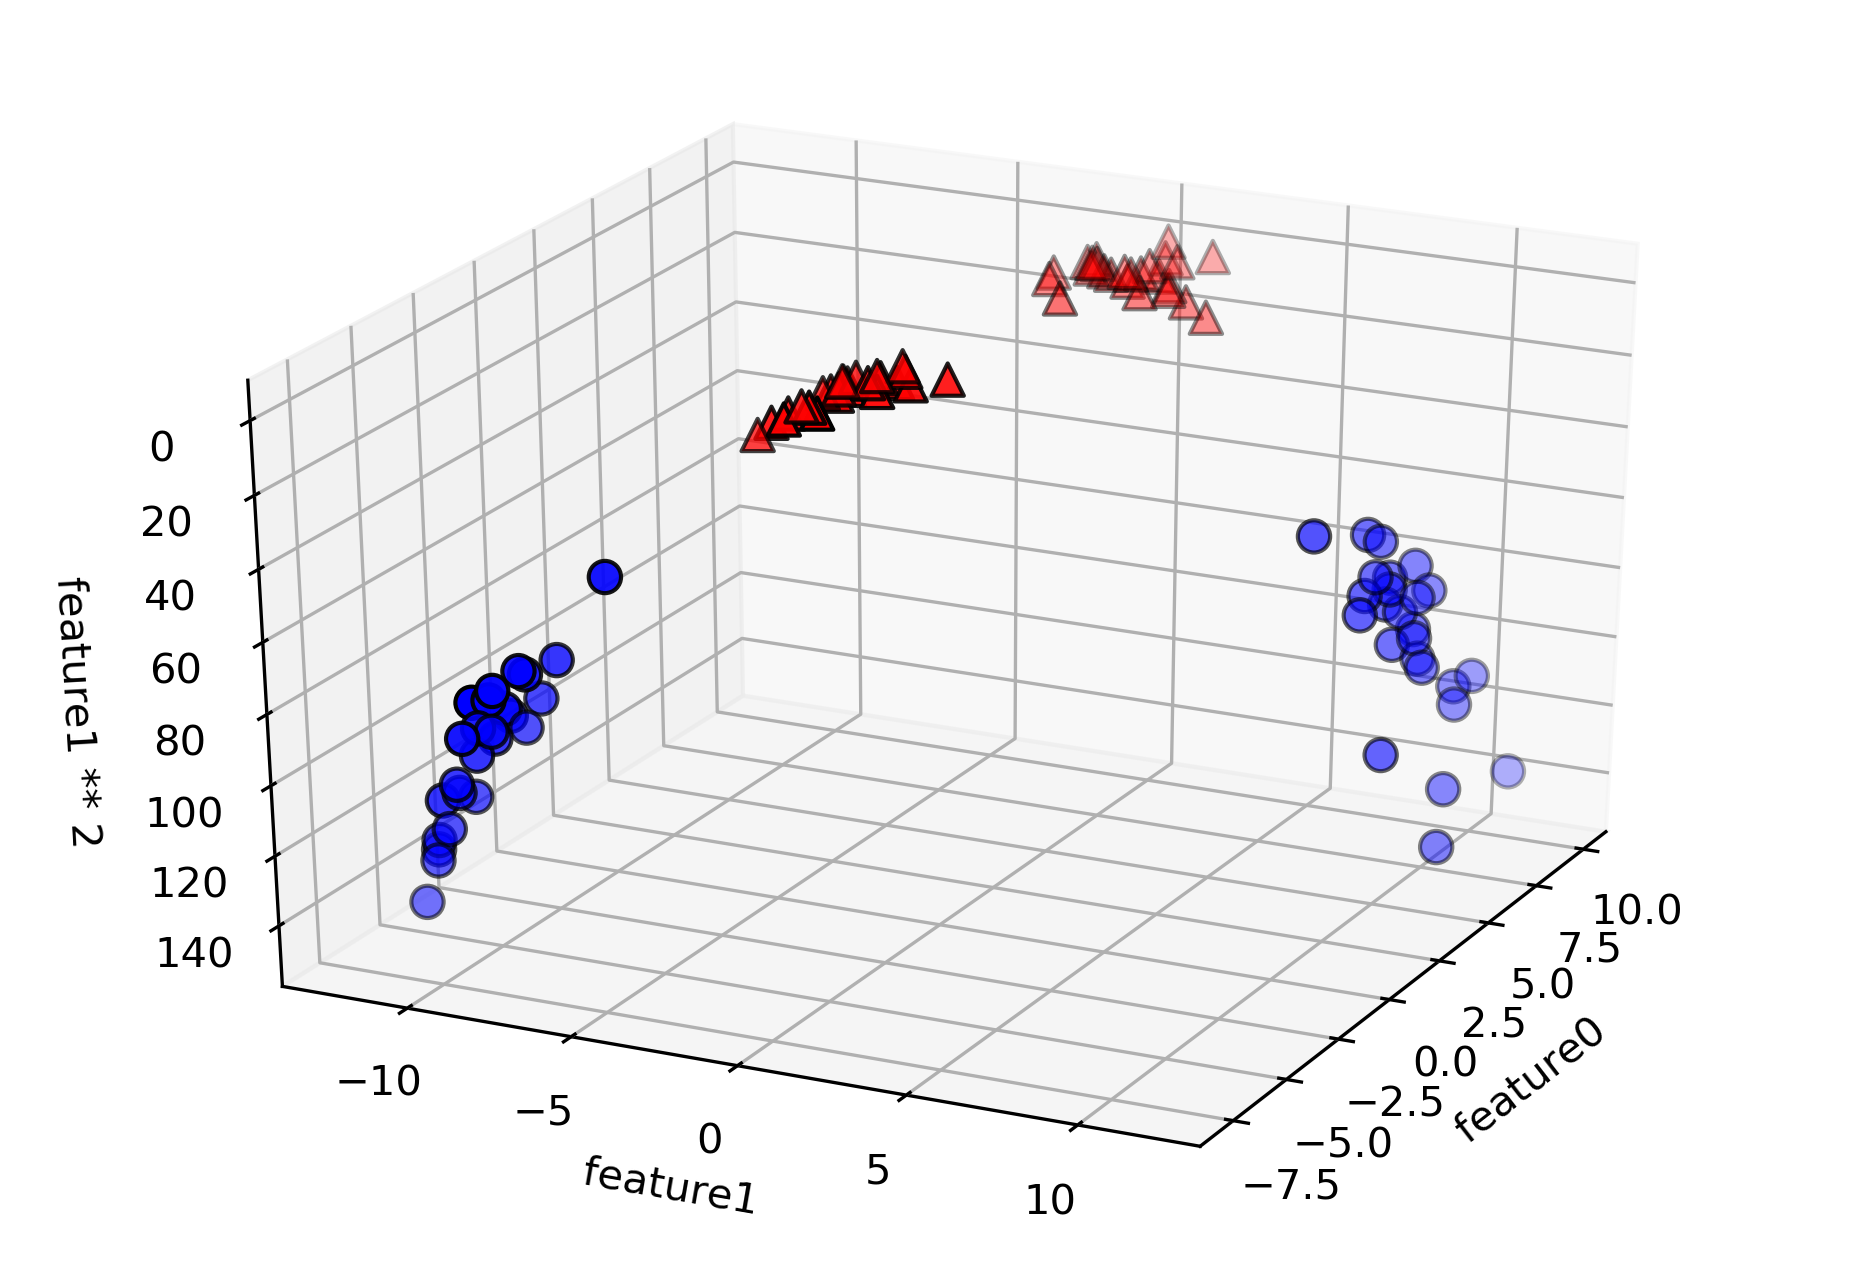

In [5]:
#두 번째 특성을 제곱하여 추가
X_new = np.hstack([X, X[:, 1:] ** 2])
print(X.shape)
print(X_new.shape)

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D

ax = Axes3D(figure, elev=-152, azim=-26)

# plot first all the points with y==0, then all with y == 1
mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

- 3차원 데이터셋을 이용한 SVM 수행 결과

Text(0.5,0,'feature 1 ** 2')

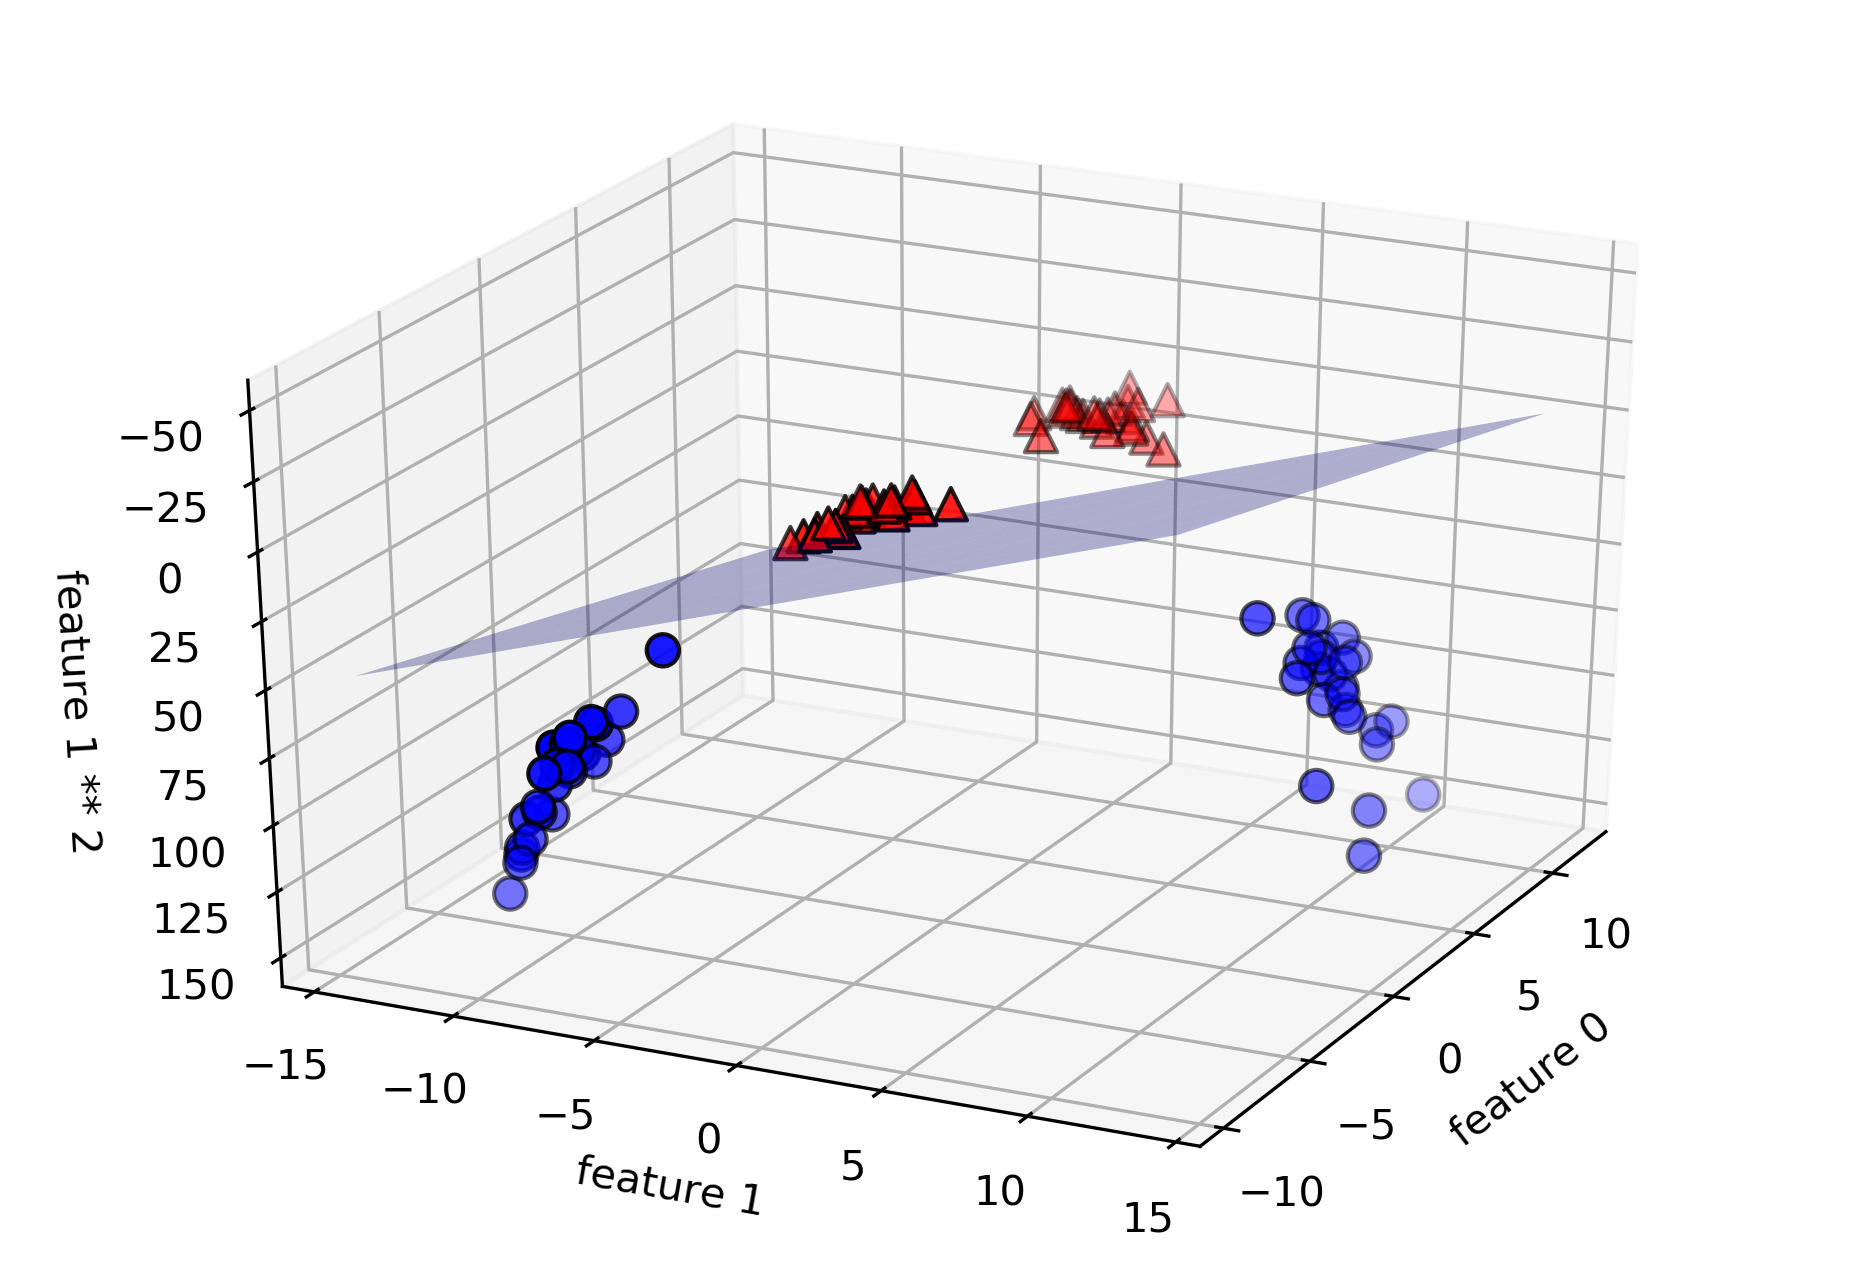

In [6]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")

- 원래 두개 특성에 투영한 결정 경계

Text(0,0.5,'feature 1')

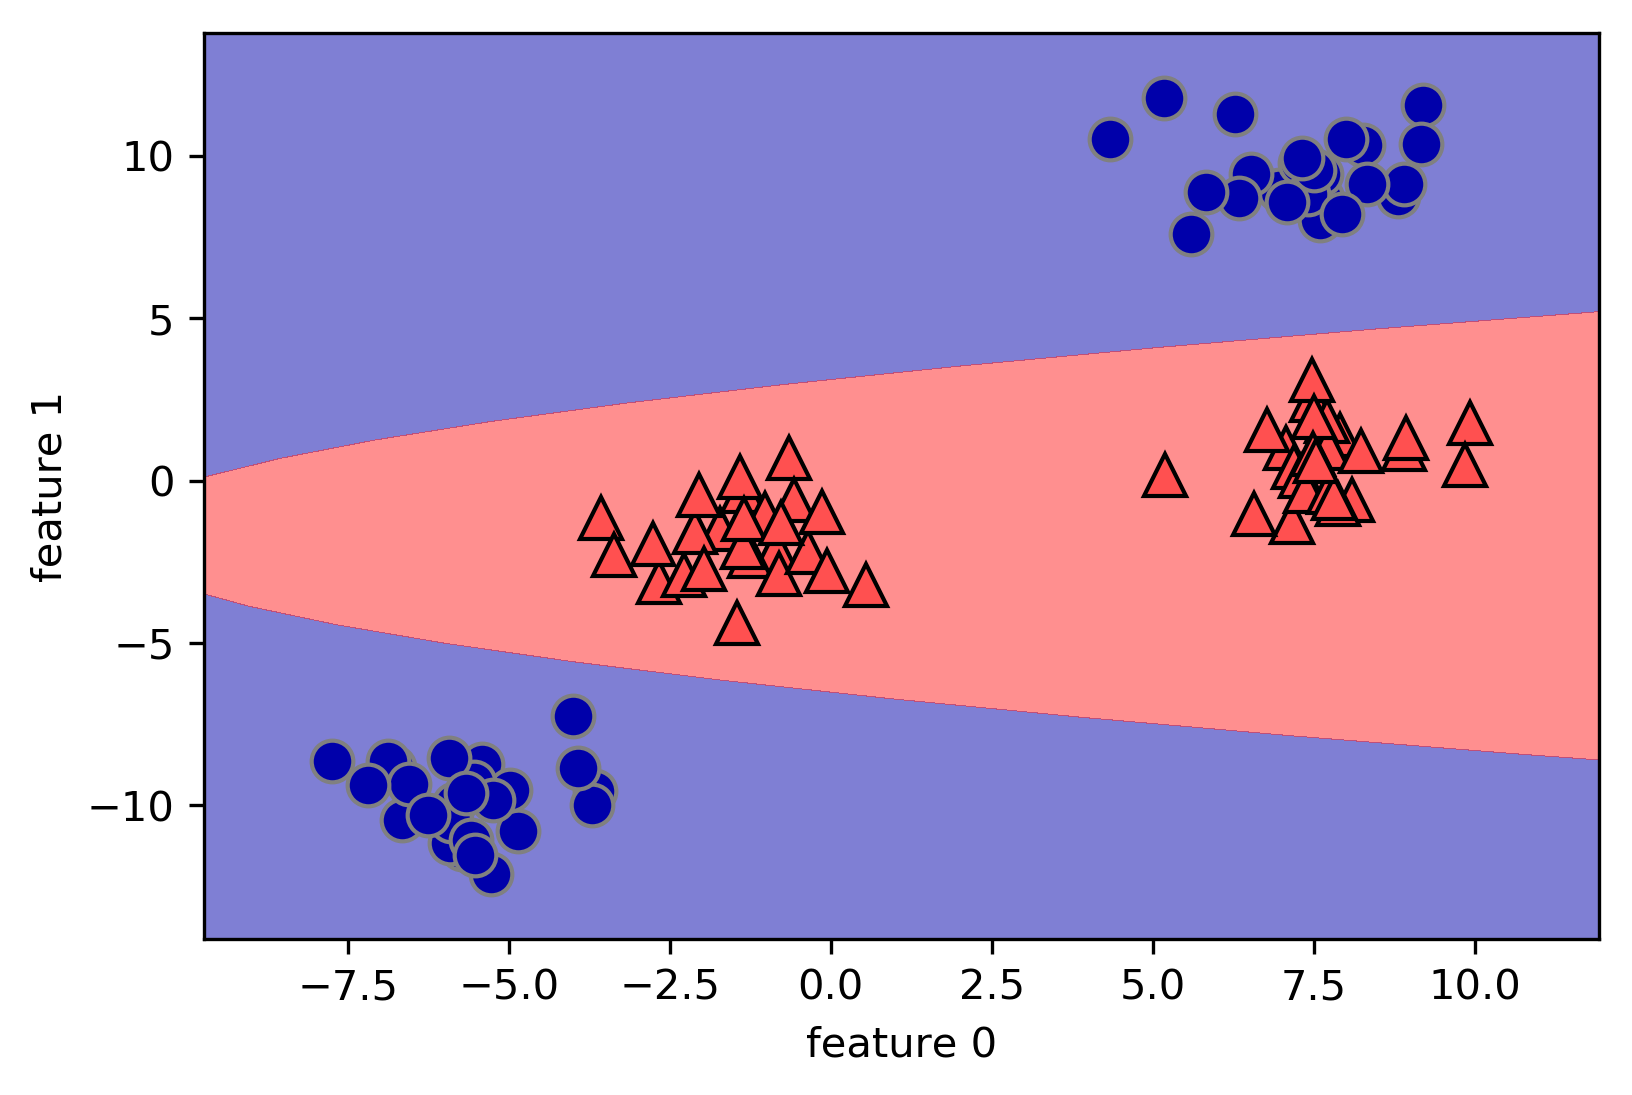

In [7]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

### 커널 기법
- 새로운 특성을 만들지 않고 분류 시킬 수 있는 방법
    - 데이터 포인트들의 거리를 계산 (스칼라 곱)
    
### SVM 이해하기
- 새로운 데이터 포인트의 대해 예측하려면 거리 측정이 필요
- 가우시안 커널에 의해 계산

X's Shape:  (26, 2)
y's Shape:  (26,)


Text(0,0.5,'feature 1')

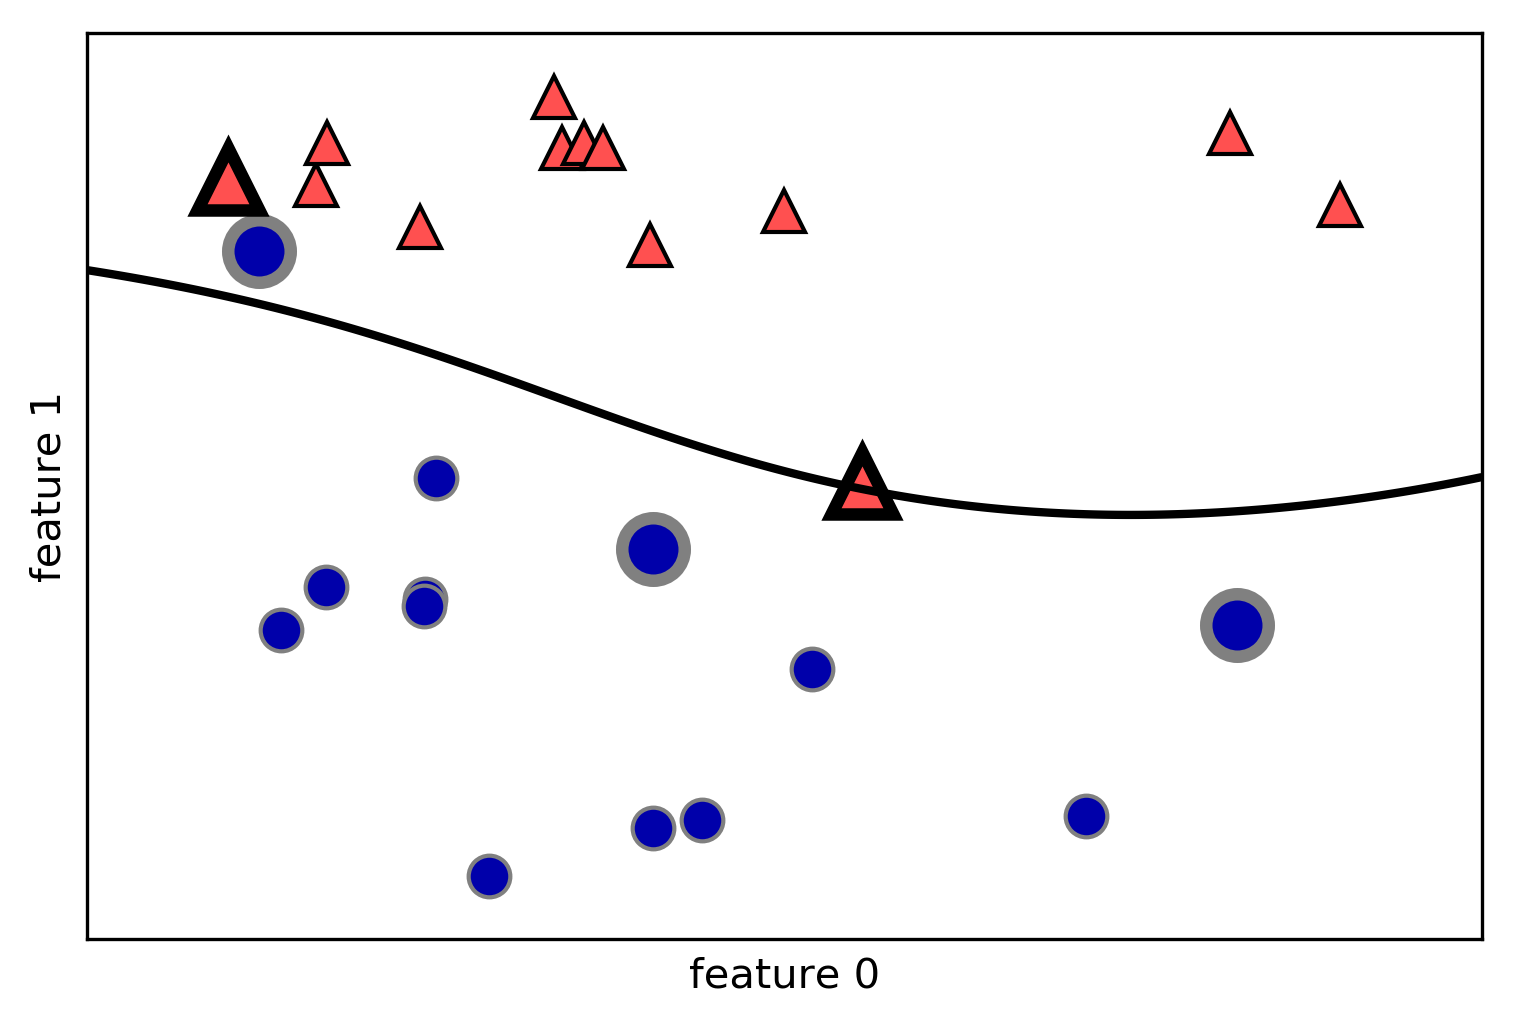

In [10]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
print("X's Shape: ", X.shape)
print("y's Shape: ", y.shape)
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 백터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 백터의 클래스 레이블이 결정
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

- RBF 커널을 사용한 SVM 으로 만든 결정 경계와 서포트 백터
    - SVM 은 매우 부드럽고 버신형 경계를 생성
    - C와 gamma 매개변수를 살펴보기

### SVM 매개변수 튜닝
- gamma: 가우시안 커널 폭의 역수, 하나의 훈련 샘플이 미치는 영향을 결정
- C: 선형 모델을 사용한 것과 비슷하나 규제 매개변수

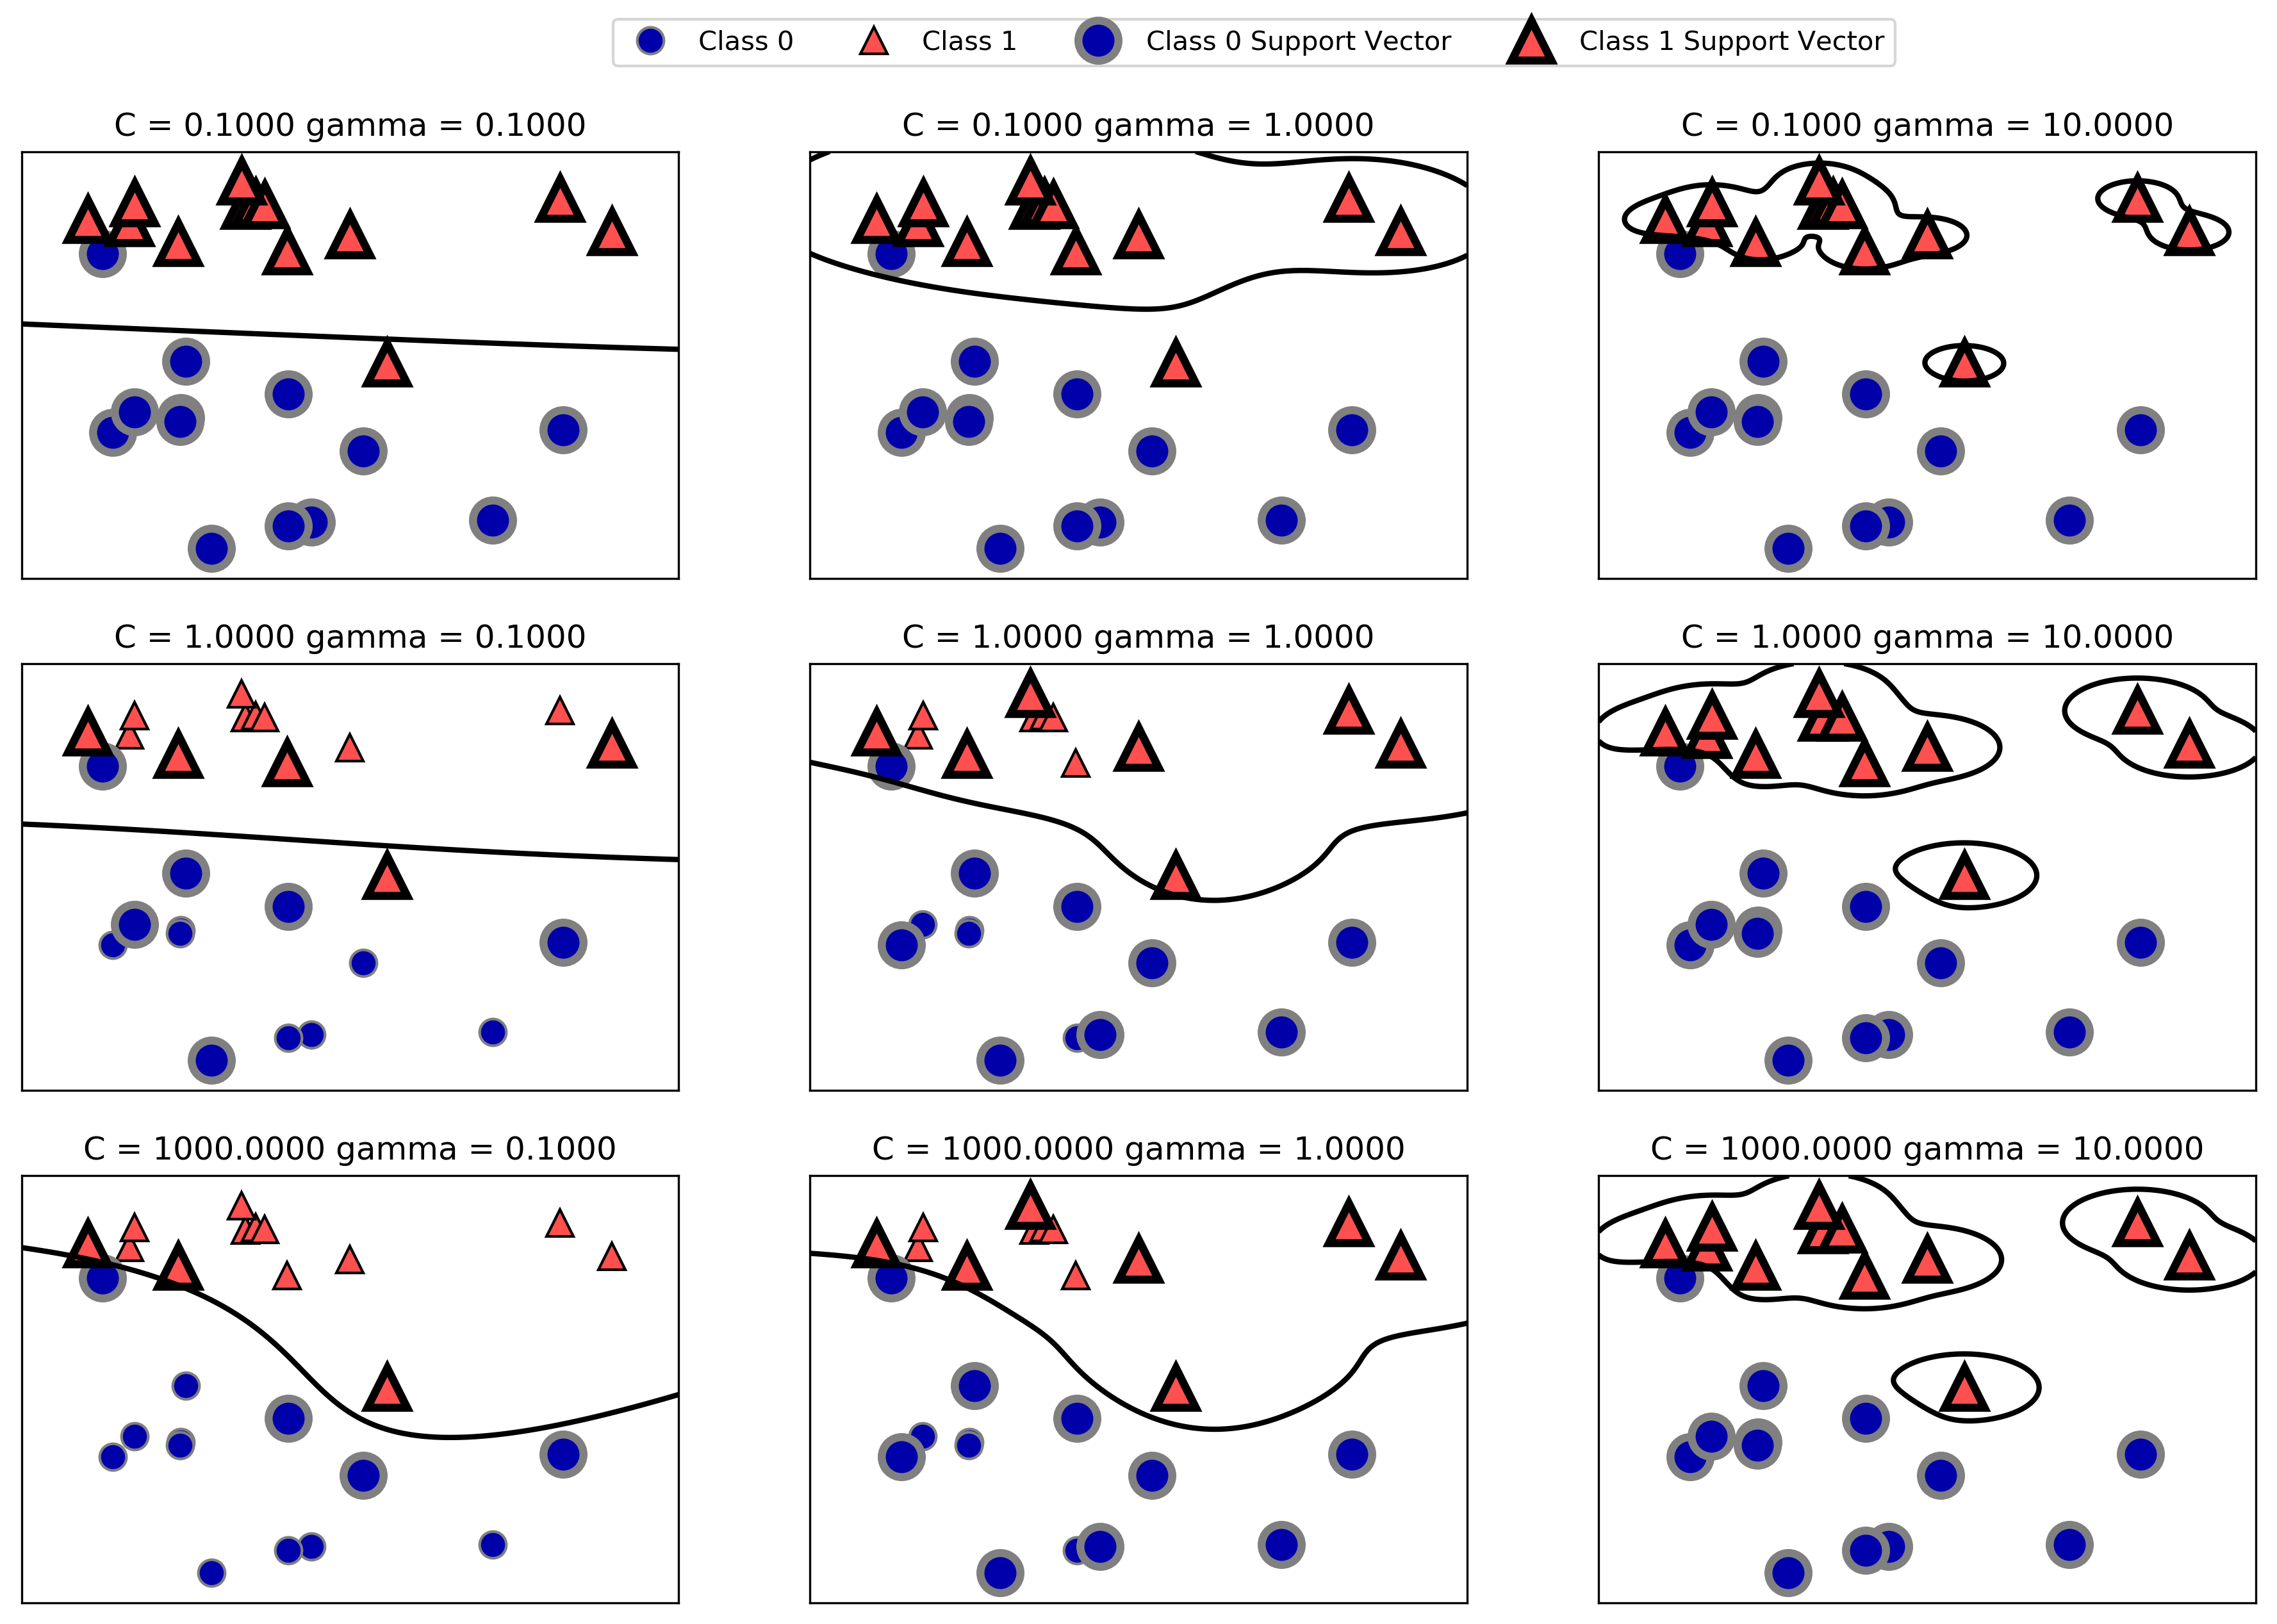

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["Class 0", "Class 1", "Class 0 Support Vector", "Class 1 Support Vector"], ncol=4, loc=(.9, 1.2))

- gamma 값은 가우시안 커너릥 반경을 크게 함
    - gamma의 값에 따라 모델의 복잡도 결정 (크면 복잡, 작으면 덜 복잡)
- C 값은 각 데이터 포인트의 영향력을 나타냄
    - 값이 클 경우 모델에 큰 영향을 주며 휘어서 정확하게 분류 하도록 함

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Train set Accuracy: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set Accuracy: {:.2f}".format(svc.score(X_test, y_test)))

Train set Accuracy: 1.00
Test set Accuracy: 0.63


- 과대적합이 발생함...

Text(0,0.5,'feagure size')

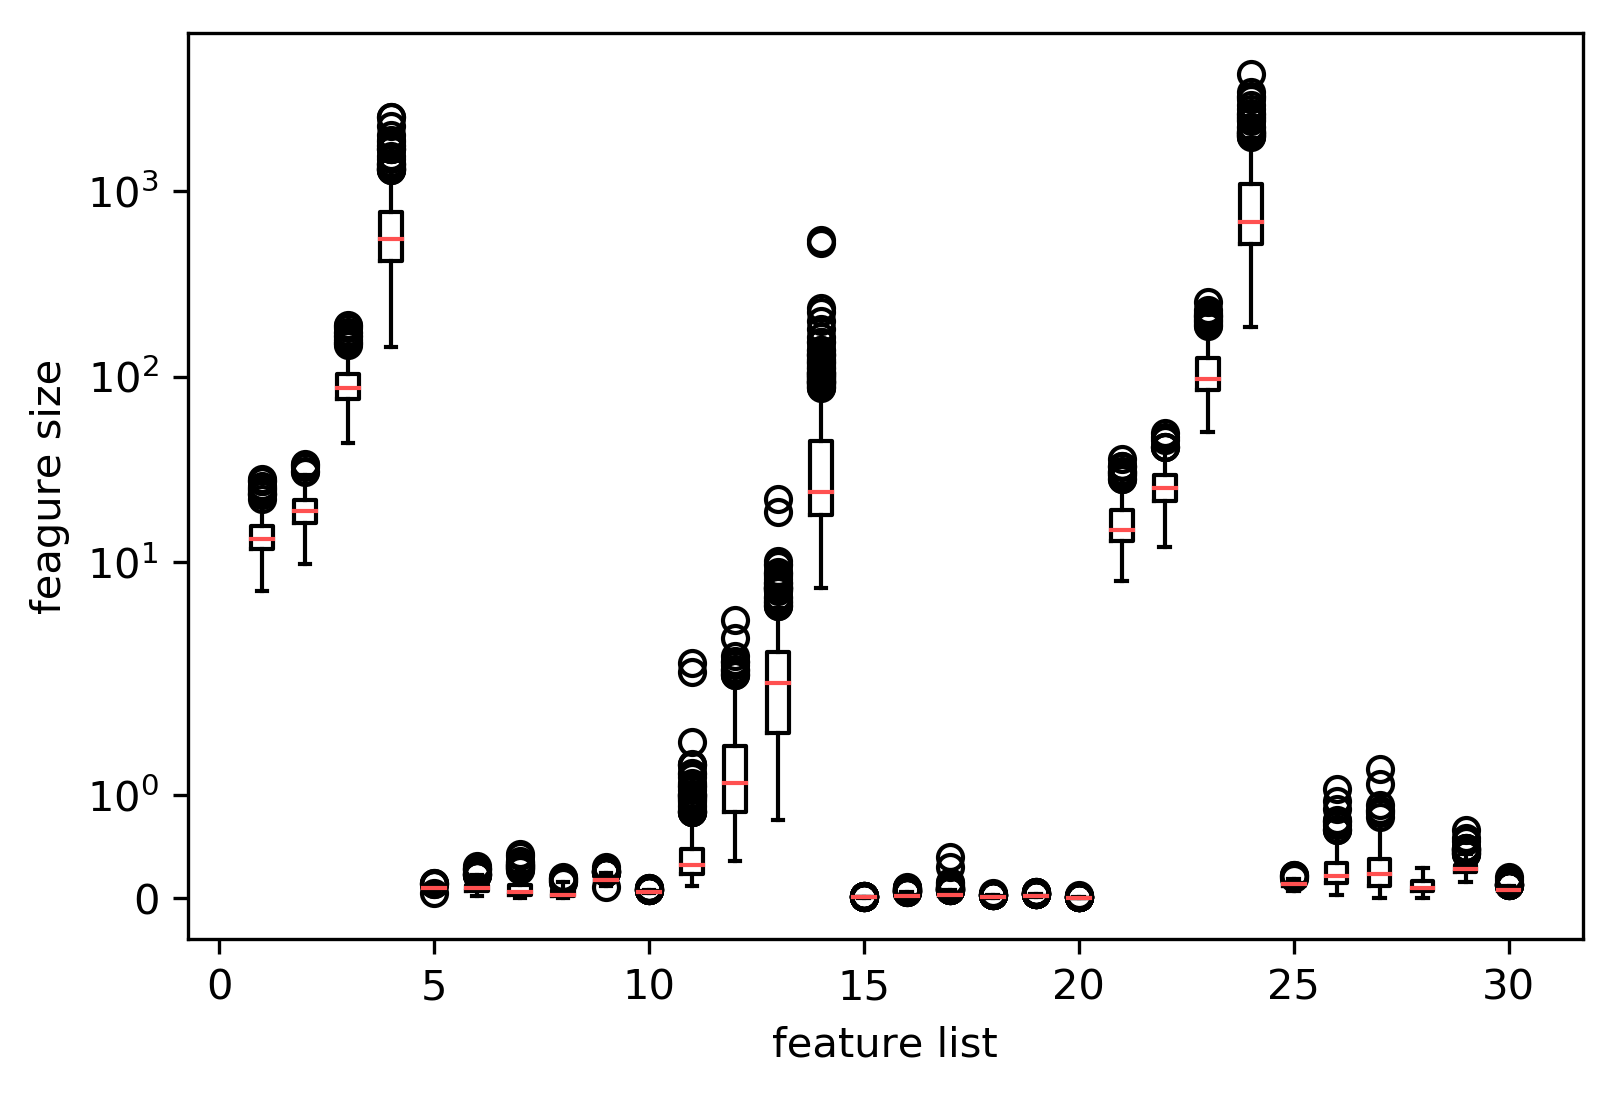

In [13]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("feature list")
plt.ylabel("feagure size")

### SVM을 위한 데이터 전처리
- 모든 특성의 값을 0과 1 사이로 맞추는 방법

In [14]:
#훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

#훈련 데이터에 최솟값을 빼고 범위로 나누면
#각 특성에 대해 최솟값은 0, 최댓값은 1
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최소 값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대 값\n{}".format(X_train_scaled.max(axis=0)))

특성별 최소 값
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
특성별 최대 값
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [15]:
#테스트 세트에도 같은 작업 적용
X_test_scaled = (X_test - min_on_training) / range_on_training

In [16]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Train set Accuracy: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Test set Accuracy: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Train set Accuracy: 0.948
Test set Accuracy: 0.951


- 훈련과 테스트 정확도가 100은 아니지만 과대적합 발생 없음
- C나 Gamma 값의 변화를 주어 더 복잡한 모델 생성

In [17]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Train set Accuracy: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Test set Accuracy: {:.3f}".format(svc.score(X_test_scaled, y_test)))
#결과가 test의 값이 상승

Train set Accuracy: 0.988
Test set Accuracy: 0.972
